In [1]:
import numpy as np
import pandas as pd
import scipy.io

import matplotlib.pyplot as plt

from M1S_tools import *

plt.jet()

%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
Afz =  (27685, 170)
Afx =  (27685, 170)
Afy =  (27685, 170)
U matrix (27685, 170)
V matrix (170, 170)
S matrix (170, 170)
N node =  27685


<Figure size 640x480 with 0 Axes>

In [2]:
start_time = 1732125510
end_time = 1732125780
duration = end_time - start_time

In [9]:
mirror_z, tt = getDBData(start_time,'m1_s1_support_ctrl/s/mirror_position/value', duration_in_s=duration, samples=100)
sa_force, tt = getDBData(start_time,'m1_s1_support_ctrl/s/sa_force/value', duration_in_s=duration, samples=100)
bend_force, tt = getDBData(start_time,'m1_s1_support_ctrl/s/sa_bending_force/value', duration_in_s=duration, samples=100)
g_load, tt = getDBData(start_time,'m1_s1_support_ctrl/s/gravity_load/value', duration_in_s=duration, samples=100)
ofl6, tt = getDBData(start_time,'m1_s1_support_ctrl/s/ofl_correction/value', duration_in_s=duration, samples=100)
hold_idx = abs(mirror_z[:,2])<20e-6  #select times where mirror was fully raised. FIRST TIME, 20 MICRONS
sa_force_z_total = np.sum(sa_force[:,:,2], axis=1)
hold_force = sa_force[hold_idx]
bend_force = bend_force[hold_idx]
hold_force_per_puck = np.mean(hold_force, axis=0)[:,2]/npuck
bend_force_per_puck = np.mean(bend_force, axis=0)[:,2]/npuck

m1_s1_support_ctrl/s/mirror_position/value
2024-11-20 10:58:30  duration =  270  s
(100, 6)
m1_s1_support_ctrl/s/sa_force/value
2024-11-20 10:58:30  duration =  270  s
(100, 170, 3)
m1_s1_support_ctrl/s/sa_bending_force/value
2024-11-20 10:58:30  duration =  270  s
(100, 170, 3)
m1_s1_support_ctrl/s/gravity_load/value
2024-11-20 10:58:30  duration =  270  s
(100, 6)
m1_s1_support_ctrl/s/ofl_correction/value
2024-11-20 10:58:30  duration =  270  s
(100, 6)


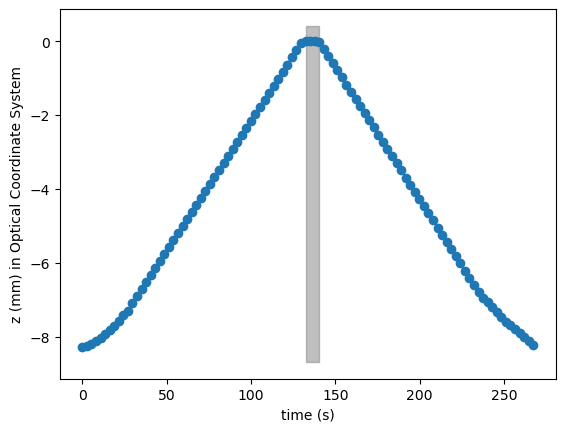

In [10]:
plt.plot(tt-tt[0], mirror_z[:,2]*1e3, '-o');
plt.xlabel('time (s)')
plt.ylabel('z (mm) in Optical Coordinate System');
#plt.gca().invert_yaxis();

ymin, ymax = plt.ylim()
true_indices = np.where(hold_idx == True)[0]
plt.fill_betweenx(y=[ymin, ymax], x1=tt[true_indices[0]]-tt[0], x2=tt[true_indices[-1]]-tt[0], 
                  color='gray', alpha=0.5, label="Fully Raised")

In [11]:
idx12 = np.ix_(hold_idx,np.array(dfSA['LSActType']==5)) #select 10 actuators under quads
print(sa_force[idx12[0], idx12[1],2]) #select z force only.
print(saID[np.array(dfSA['LSActType']==5)])

[[834.00738525 853.00457764 901.53668213 848.73693848 892.17498779
  833.74493408 852.04663086 898.33544922 850.01806641 893.54638672]
 [833.38146973 849.82666016 898.65368652 848.07922363 892.20678711
  832.70733643 850.6293335  895.63879395 848.5067749  892.53588867]
 [833.14263916 849.86999512 896.04968262 847.699646   892.89117432
  832.78381348 850.05456543 896.10778809 848.09625244 892.31011963]
 [833.11962891 865.54608154 912.99468994 850.57714844 903.69403076
  848.12426758 864.01312256 915.58587646 854.22436523 897.06298828]]
[ 144  313  326  113  126 1144 1313 1326 1113 1126]


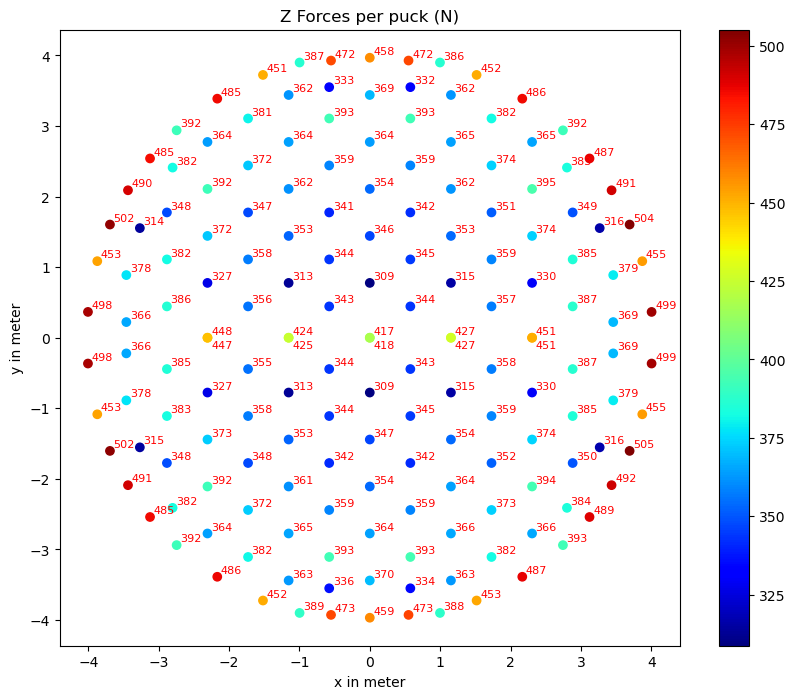

In [13]:
showForceMap(hold_force_per_puck, 'Z Forces per puck (N)')

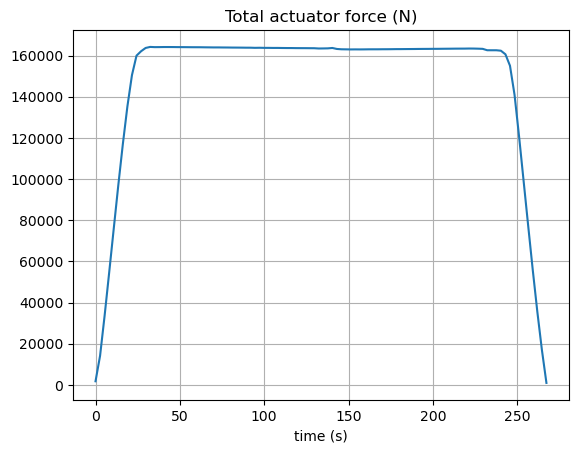

In [14]:
plt.plot(tt-tt[0], sa_force_z_total)
plt.grid()
plt.xlabel('time (s)')
#plt.gca().invert_yaxis();
plt.title('Total actuator force (N)');

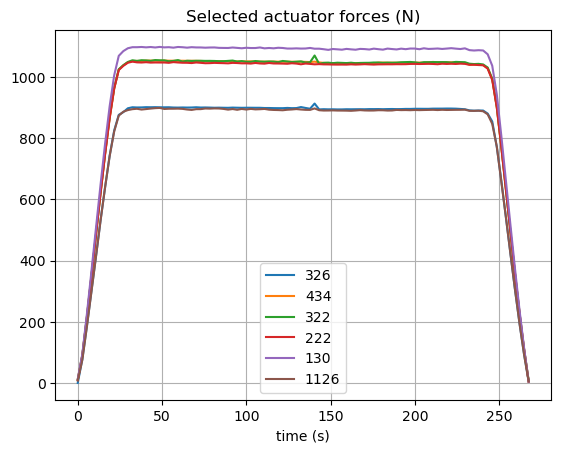

In [15]:
sa_plot = [326, 434, 322, 222, 130, 1126]
for id in sa_plot:
    cc = sa_force[:,saID==id, 2]
    plt.plot(tt-tt[0], cc, label='%d'%id)
plt.grid()
plt.xlabel('time (s)')
plt.legend()
#plt.gca().invert_yaxis();
plt.title('Selected actuator forces (N)');

## Force related variables in the DB (all in the M1B coordinate system)

s/gravity_load: 6, The gravity load forces and moments  
s/ofl_correction: 6, The outer force loop correction forces and moments   
s/total_load: 6, The total load forces and moments  
s/x_bending_mode: 90, The bending mode coefficients for the X axis  
s/y_bending_mode: 90, The bending mode coefficients for the Y axis  
s/z_bending_mode: 170, The bending mode coefficients for the Z axis  
s/mirror_force: 6, The outer (=net) forces of the mirror; calculated from hp_force  
s/mirror_force_disturbance: 6, The outer force disturbances of the mirror  
s/hp_force: 6, The force of the hardpoint  
s/sa_support_force: 170x3, The support force offsets of the support actuators.  
s/sa_bending_force: 170x3, The bending force offsets of the support actuators  
s/sa_unsafe_force: 170x3, The total unverified forces of the support actuators  
s/sa_force: 170x3, The total verified forces of the support actuators  
s/sa_force_moment: 6, The force and moments of the total verified forces of the support actuators.  

sa_force = sa_support_force + sa_bending_force  
sa_support_force = k_matrix(gravity_load + ofl_correction)  
The Fz component of gravity_load is nominal mirror weight  
mirror_foce = hp_matrix(hp_force)  

## Other variables might be of interest
s/mirror_state  
s/mirror_motion_mode  
s/mirror_position: 6  
s/mirror_velocity: 6  
s/hp_control_mode  
s/hp_position: 6  
s/hp_velocity: 6  
s/sa_state: 170  

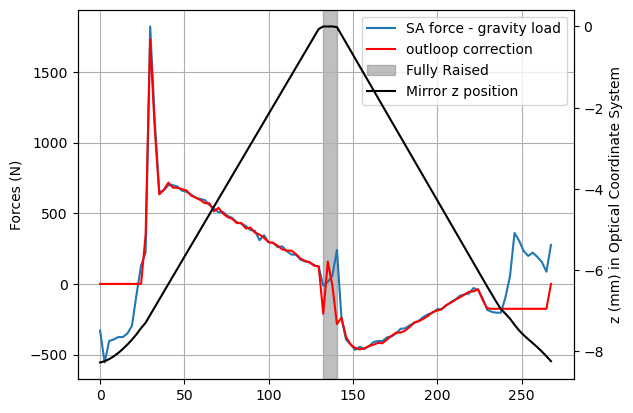

In [16]:
fig, ax1 = plt.subplots()

ax1.plot(tt-tt[0], (sa_force_z_total-g_load[:,2]), label='SA force - gravity load') #visually above y=0 means sa_force is larger than gravity.
ax1.plot(tt-tt[0], ofl6[:,2],'r', label='outloop correction')
#ax1.invert_yaxis();

ymin, ymax = ax1.get_ylim()
true_indices = np.where(hold_idx == True)[0]
ax1.fill_betweenx(y=[ymin, ymax], x1=tt[true_indices[0]]-tt[0], x2=tt[true_indices[-1]]-tt[0], 
                  color='gray', alpha=0.5, label="Fully Raised")
ax1.set_ylim([ymin, ymax])
ax1.set_ylabel('Forces (N)')
ax2 = ax1.twinx()

ax2.plot(tt-tt[0], mirror_z[:,2]*1e3, '-k', label='Mirror z position');
ax2.set_xlabel('time (s)')
ax2.set_ylabel('z (mm) in Optical Coordinate System')
#ax2.legend()
#ax2.invert_yaxis();

# Merge legends from both axes
# Get handles and labels for both axes
handles, labels = [], []
handles.extend(ax1.get_legend_handles_labels()[0])
labels.extend(ax1.get_legend_handles_labels()[1])
handles.extend(ax2.get_legend_handles_labels()[0])
labels.extend(ax2.get_legend_handles_labels()[1])

# Create a single legend for both axes
ax1.legend(handles, labels)
ax1.grid();
#ax2.grid();
#ax1.legend()

In [19]:
start_time = 1732213163
end_time = 1732213463
duration = end_time - start_time
print(duration)

300


In [20]:
mirror_z, tt = getDBData(start_time,'m1_s1_support_ctrl/s/mirror_position/value', duration_in_s=duration, samples=100)
sa_force, tt = getDBData(start_time,'m1_s1_support_ctrl/s/sa_force/value', duration_in_s=duration, samples=100)
bend_force, tt = getDBData(start_time,'m1_s1_support_ctrl/s/sa_bending_force/value', duration_in_s=duration, samples=100)
g_load, tt = getDBData(start_time,'m1_s1_support_ctrl/s/gravity_load/value', duration_in_s=duration, samples=100)
ofl6, tt = getDBData(start_time,'m1_s1_support_ctrl/s/ofl_correction/value', duration_in_s=duration, samples=100)
hold_idx = abs(mirror_z[:,2])<20e-6  #select times where mirror was fully raised. FIRST TIME, 20 MICRONS
sa_force_z_total = np.sum(sa_force[:,:,2], axis=1)
hold_force = sa_force[hold_idx]
bend_force = bend_force[hold_idx]
hold_force_per_puck = np.mean(hold_force, axis=0)[:,2]/npuck
bend_force_per_puck = np.mean(bend_force, axis=0)[:,2]/npuck

m1_s1_support_ctrl/s/mirror_position/value
2024-11-21 11:19:23  duration =  300  s
(100, 6)
m1_s1_support_ctrl/s/sa_force/value
2024-11-21 11:19:23  duration =  300  s
(100, 170, 3)
m1_s1_support_ctrl/s/sa_bending_force/value
2024-11-21 11:19:23  duration =  300  s
(100, 170, 3)
m1_s1_support_ctrl/s/gravity_load/value
2024-11-21 11:19:23  duration =  300  s
(100, 6)
m1_s1_support_ctrl/s/ofl_correction/value
2024-11-21 11:19:23  duration =  300  s
(100, 6)


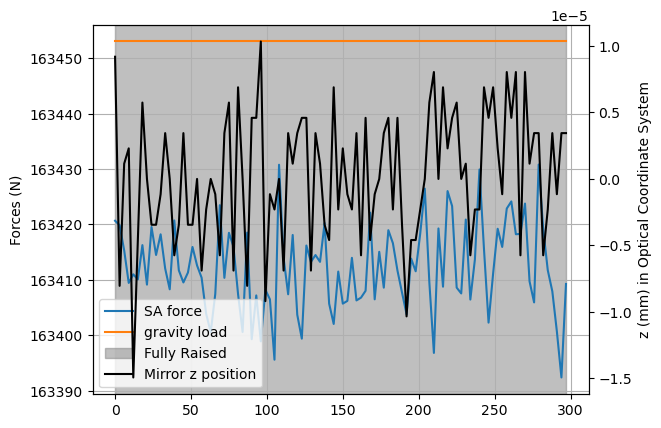

In [21]:
fig, ax1 = plt.subplots()

ax1.plot(tt-tt[0], (sa_force_z_total), label='SA force') #visually above y=0 means sa_force is larger than gravity.
ax1.plot(tt-tt[0], (g_load[:,2]), label='gravity load') #visually above y=0 means sa_force is larger than gravity.
#ax1.plot(tt-tt[0], ofl6[:,2],'r', label='outloop correction')
#ax1.invert_yaxis();

ymin, ymax = ax1.get_ylim()
true_indices = np.where(hold_idx == True)[0]
ax1.fill_betweenx(y=[ymin, ymax], x1=tt[true_indices[0]]-tt[0], x2=tt[true_indices[-1]]-tt[0], 
                  color='gray', alpha=0.5, label="Fully Raised")
ax1.set_ylim([ymin, ymax])
ax1.set_ylabel('Forces (N)')
ax2 = ax1.twinx()

ax2.plot(tt-tt[0], mirror_z[:,2]*1e3, '-k', label='Mirror z position');
ax2.set_xlabel('time (s)')
ax2.set_ylabel('z (mm) in Optical Coordinate System')
#ax2.legend()
#ax2.invert_yaxis();

# Merge legends from both axes
# Get handles and labels for both axes
handles, labels = [], []
handles.extend(ax1.get_legend_handles_labels()[0])
labels.extend(ax1.get_legend_handles_labels()[1])
handles.extend(ax2.get_legend_handles_labels()[0])
labels.extend(ax2.get_legend_handles_labels()[1])

# Create a single legend for both axes
ax1.legend(handles, labels)
ax1.grid();
#ax2.grid();
#ax1.legend()

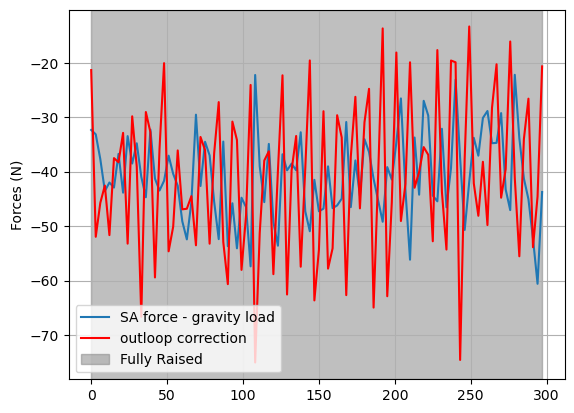

In [23]:
fig, ax1 = plt.subplots()

ax1.plot(tt-tt[0], (sa_force_z_total-g_load[:,2]), label='SA force - gravity load') #visually above y=0 means sa_force is larger than gravity.
ax1.plot(tt-tt[0], ofl6[:,2],'r', label='outloop correction')
#ax1.invert_yaxis();

ymin, ymax = ax1.get_ylim()
true_indices = np.where(hold_idx == True)[0]
ax1.fill_betweenx(y=[ymin, ymax], x1=tt[true_indices[0]]-tt[0], x2=tt[true_indices[-1]]-tt[0], 
                  color='gray', alpha=0.5, label="Fully Raised")
ax1.set_ylim([ymin, ymax])
ax1.set_ylabel('Forces (N)')

# Create a single legend for both axes
ax1.legend()
ax1.grid();
#ax2.grid();
#ax1.legend()

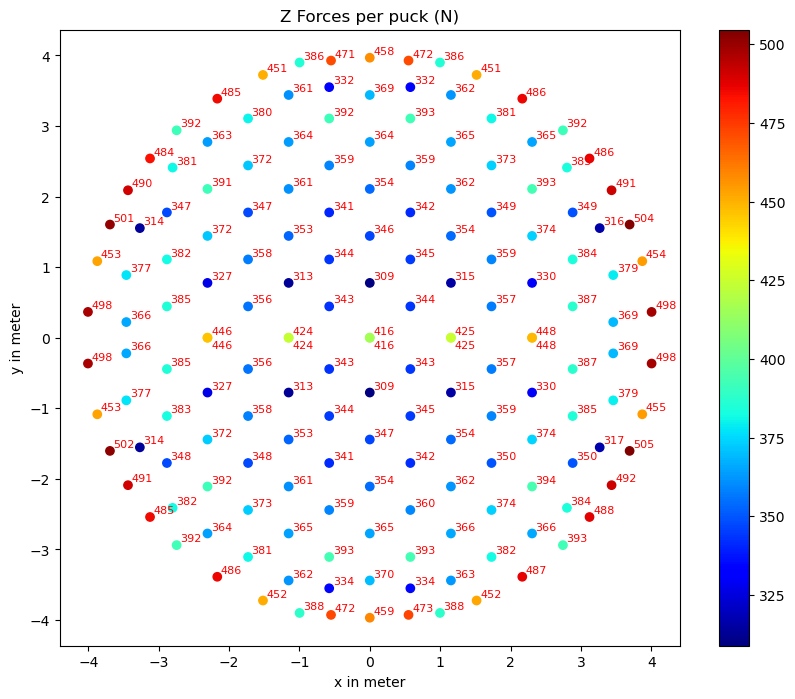

In [24]:
showForceMap(hold_force_per_puck, 'Z Forces per puck (N)')

### Below, we just print out some sample values of variables, to see what they look like

In [15]:
printDBVar(start_time,'m1_s1_support_ctrl/s/gravity_load/value')

m1_s1_support_ctrl/s/gravity_load/value
2024-11-21 11:19:23
[2.0017219326103232e-11, 0, -163453, 0, -4.740053515758054e-12, 0]
[2.0017219326103232e-11, 0, -163453, 0, -4.740053515758054e-12, 0]
[2.0017219326103232e-11, 0, -163453, 0, -4.740053515758054e-12, 0]
[2.0017219326103232e-11, 0, -163453, 0, -4.740053515758054e-12, 0]
[2.0017219326103232e-11, 0, -163453, 0, -4.740053515758054e-12, 0]
[2.0017219326103232e-11, 0, -163453, 0, -4.740053515758054e-12, 0]
[2.0017219326103232e-11, 0, -163453, 0, -4.740053515758054e-12, 0]
[2.0017219326103232e-11, 0, -163453, 0, -4.740053515758054e-12, 0]
[2.0017219326103232e-11, 0, -163453, 0, -4.740053515758054e-12, 0]
[2.0017219326103232e-11, 0, -163453, 0, -4.740053515758054e-12, 0]


In [16]:
printDBVar(start_time,'m1_s1_support_ctrl/s/mirror_state/value')
printDBVar(start_time,'m1_s1_support_ctrl/s/mirror_state/goal')
printDBVar(start_time,'m1_s1_support_ctrl/s/gravity_load/value')
printDBVar(start_time,'m1_s1_support_ctrl/s/gravity_load/goal')

m1_s1_support_ctrl/s/mirror_state/value
2024-11-21 11:19:23
RUN
RUN
RUN
RUN
RUN
RUN
RUN
RUN
RUN
RUN
m1_s1_support_ctrl/s/mirror_state/goal
2024-11-21 11:19:23
RUN
RUN
RUN
RUN
RUN
RUN
RUN
RUN
RUN
RUN
m1_s1_support_ctrl/s/gravity_load/value
2024-11-21 11:19:23
[2.0017219326103232e-11, 0, -163453, 0, -4.740053515758054e-12, 0]
[2.0017219326103232e-11, 0, -163453, 0, -4.740053515758054e-12, 0]
[2.0017219326103232e-11, 0, -163453, 0, -4.740053515758054e-12, 0]
[2.0017219326103232e-11, 0, -163453, 0, -4.740053515758054e-12, 0]
[2.0017219326103232e-11, 0, -163453, 0, -4.740053515758054e-12, 0]
[2.0017219326103232e-11, 0, -163453, 0, -4.740053515758054e-12, 0]
[2.0017219326103232e-11, 0, -163453, 0, -4.740053515758054e-12, 0]
[2.0017219326103232e-11, 0, -163453, 0, -4.740053515758054e-12, 0]
[2.0017219326103232e-11, 0, -163453, 0, -4.740053515758054e-12, 0]
[2.0017219326103232e-11, 0, -163453, 0, -4.740053515758054e-12, 0]
m1_s1_support_ctrl/s/gravity_load/goal
2024-11-21 11:19:23
[2.001721932

In [17]:
printDBVar(start_time,'m1_s1_support_ctrl/s/total_load/value')
printDBVar(start_time,'m1_s1_support_ctrl/s/total_load/goal')

m1_s1_support_ctrl/s/total_load/value
2024-11-21 11:19:23
[199.63263202118262, 203.70919768516504, -163415.59446761, -476.82509968506645, -283.6498002012059, -327.805876775033]
[199.72492146818263, 203.64922724916505, -163418.33550924, -469.8923908884665, -286.28798047580597, -327.874592989533]
[199.69996958018262, 203.31725691916503, -163421.60123909, -464.9474579082665, -289.62625523640605, -328.032191210183]
[199.71831674818262, 203.70336793316503, -163424.491770705, -459.92739855966647, -291.712324395806, -327.888101581833]
[199.46961975678263, 203.22092621156503, -163427.09226359, -454.76394248046654, -294.56730155420604, -327.32138801723295]
[199.49771972678263, 204.06841182916503, -163428.77205551, -450.26229987246654, -297.5265387138061, -327.5713030433329]
[199.41488336838262, 204.60717949516504, -163430.66336001, -446.38898728626646, -299.86069080840605, -327.66719624758286]
[199.15002199078262, 205.49381942716502, -163431.38642473498, -443.52821574126654, -300.383430032006, 

In [18]:
printDBVar(start_time,'m1_s1_support_ctrl/s/mirror_force/value')
printDBVar(start_time,'m1_s1_support_ctrl/s/mirror_force/goal')

m1_s1_support_ctrl/s/mirror_force/value
2024-11-21 11:19:23
[0.4860531199999909, 5.69741548, 20.32825750000001, -24.48147275999999, 14.630059640000002, -3.3417481999998486]
[0.7557130799999923, 0.24103574000000005, 13.08599825000001, -33.704665649999974, 15.652779849999991, 3.2830855500001572]
[0.19517623999999367, 2.794836980000006, 17.17487375000001, -19.13861492999998, 12.229148329999985, -4.318784749999857]
[1.1563765799999906, 3.5572866999999975, 17.09068675000001, -21.707076329999985, 12.122720269999993, -3.817117949999872]
[1.9696016699999963, -0.17840869999999498, 13.444518750000013, -28.03989767999997, 18.454311579999956, 1.2561898500002222]
[2.0099617499999964, -2.7789930999999912, 11.245496250000004, -21.819178379999975, 17.75909375999998, 0.2730847500001907]
[1.038064829999998, -3.3665924400000007, 11.105426500000002, -19.614069929999985, 8.902675309999985, -1.2743954999998923]
[2.879891989999996, -6.945091959999999, 7.841003000000007, -15.210292949999998, 6.881227689999971

In [19]:
printDBVar(start_time,'m1_s1_support_ctrl/s/mirror_force_disturbance/value')
printDBVar(start_time,'m1_s1_support_ctrl/s/mirror_force_disturbance/goal')

m1_s1_support_ctrl/s/mirror_force_disturbance/value
2024-11-21 11:19:23
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
m1_s1_support_ctrl/s/mirror_force_disturbance/goal
2024-11-21 11:19:23
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
